# **Customer Churn Prediction Challenge For Azubian**

## 1.1 **Project Statement of the Problem**:
The focus of this project is a customer churn prediction for an African telecommunications firm that provides customers with airtime and mobile data bundles. The company aims to create a machine learning model capable of effectively forecasting the probability of individual customers "churning," which means they become inactive and not making any transactions for a period of 90 days. Accurate churn prediction plays a pivotal role in the company's success, as it empowers proactive strategies to retain customers and minimize revenue loss.

## 1.2 **Project Objective**:
The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days. This will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

### 1.3 Data Understanding

The dataset contains information about the location of clients, the services that they use, the regularity of service use, and their churn status. The columns in the dataset are described below:

- **user_id**: user ID
- **REGION**: the location of each client
- **TENURE**: duration in the network
- **MONTANT**: top-up amount
- **FREQUENCE_RECH**: number of times the client recharged
- **REVENUE**: monthly income of each client
- **ARPU_SEGMENT**: income over 90 days / 3
- **FREQUENCE**: number of times the client has made an income
- **DATA_VOLUME**: number of connections
- **ON_NET**: inter expresso call
- **ORANGE**: calls to orange
- **TIGO**: calls to Tigo
- **ZONE1**: calls to zones1
- **ZONE2**: calls to zones2
- **MRG**: a client who is going
- **REGULARITY**: number of times the client is active for 90 days
- **TOP_PACK**: the most active packs
- **FREQ_TOP_PACK**: number of times the client has activated the top pack packages
- **CHURN**: variable to predict - Target


## 2.0 Hypotheses and Questions

## **Hypothesis 1**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays does not influence whether the customer churns or not.

**Alternative hypothesis(H1)**: There is a significant relationship between the customers' Tenure and the churn rate. In other words, how long a customer stays influences whether the customer churns or not.

## **Hypothesis 2**

**Null hypothesis(H0)**: There is no significant relationship between the customers' Revenue and the churn rate. In other words, a customers income does not influence whether the customer churns or not.

**Alternative hypothesis(H1)**: There is a significant relationship between the customers' Revenue and the churn rate. In other words, a customers income influences whether the customer churns or not.

## **Business Questions**

### 1. What is the Company’s overall churn rate throughout the observed period?

### 2. Are there particular regions that exhibit a higher churn rate than others?

### 3. Which tenure period shows the most significant representation?

### 4. Is there a relationship between the top-up amount (MONTANT) and the churn rate?

### 5. Is there a reduced likelihood of churn among customers who frequently activate specific top-pack packages (TOP_PACK)?

### 6. Do customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning?

### 7. Is there a disparity in churn rates between customers who regularly refill their accounts (FREQUENCE_RECH) and those who refill less frequently?



## 3.0 Toolbox Loading

In [1]:
# Zindi Data Access
import requests
from tqdm.auto import tqdm

# Data Manipulation
import numpy as np
import pandas as pd
import re
import pickle

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Hiding the warnings

# Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder, LabelEncoder

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
!pip install catboost --q
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import *

# Model evaluation
from sklearn import metrics
from sklearn.metrics import *

print("Loading complete.", "Warnings hidden.")

Loading complete. Warnings hidden.


In [2]:
# Set some display options
## Removing the restriction on columns to display
pd.set_option("display.max_columns", None)

## Set display of floats to 5 decimal places
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## 4.0 Data Exploration

In [87]:
# Download the data
train = pd.read_csv("Train.csv")
test = pd.read_csv("data/Test.csv")


,tenure,montant,frequence_rech,arpu_segment,frequence,data_volume,regularity,freq_top_pack,churn
0,7,20000.00000,47.00000,7201.00000,52.00000,8835.00000,62,30.00000,0
1,7,5529.21090,11.52376,1835.35596,13.97444,3368.80172,3,9.26245,0
2,7,5529.21090,11.52376,1835.35596,13.97444,3368.80172,1,9.26245,0
3,7,7900.00000,19.00000,2632.00000,25.00000,9385.00000,61,7.00000,0
4,7,12350.00000,21.00000,4117.00000,29.00000,9360.00000,56,11.00000,0


In [88]:
dataset = train.copy()

In [89]:

dataset.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.00000,47.00000,21602.00000,7201.00000,52.00000,8835.00000,3391.00000,396.00000,185.00000,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.00000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.00000,19.00000,7896.00000,2632.00000,25.00000,9385.00000,27.00000,46.00000,20.00000,NaN,2.00000,NO,61,"Data:490F=1GB,7d",7.00000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.00000,21.00000,12351.00000,4117.00000,29.00000,9360.00000,66.00000,102.00000,34.00000,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.00000,0


In [4]:
# Check the shape of the training data
dataset.shape

(1077024, 19)

In [5]:
# Looking at information about the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [6]:
# Cast all column names to lowercase
dataset.columns = dataset.columns.str.lower()

In [7]:
# Get the percentages of missing values
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({"percent_missing": percent_missing})
missing_value_df.sort_values("percent_missing", inplace=True)
missing_value_df

,percent_missing
user_id,0.00000
regularity,0.00000
mrg,0.00000
churn,0.00000
tenure,0.00000
revenue,33.64410
arpu_segment,33.64410
frequence,33.64410
frequence_rech,35.08603
montant,35.08603


In [8]:
# Check for duplicates
dataset[dataset.duplicated()]

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn


From the dataset preview and the info above, we make the following observations:
- Out of the 18 columns, only 5 have no missing values. The columns therefore have to be assessed, and necessary action taken on the columns to deal with the missing values.
- Given the extent of missing values for zone1 and zone2 (over 90% each), they will be dropped.
- There are no duplicates in the dataset.

In [9]:
# Drop the columns with lots of missing values
dataset.drop(columns = ["zone1", "zone2", "tigo", "orange", "on_net"], inplace = True)

### 4.1 Exploration of Numeric Columns

In [10]:
# Looking at the descriptive statistics of the columns with numeric values
numerics = [column for column in dataset.columns if (dataset[column].dtype != "O")]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
dataset[numerics].describe().T

Summary table of the Descriptive Statistics of Columns with Numeric Values


,count,mean,std,min,25%,50%,75%,max
montant,699139.00000,5529.21090,7104.73795,20.00000,1000.00000,3000.00000,7350.00000,470000.00000
frequence_rech,699139.00000,11.52376,13.26194,1.00000,2.00000,7.00000,16.00000,131.00000
revenue,714669.00000,5506.05080,7175.62501,1.00000,1000.00000,3000.00000,7360.00000,532177.00000
arpu_segment,714669.00000,1835.35596,2391.87090,0.00000,333.00000,1000.00000,2453.00000,177392.00000
frequence,714669.00000,13.97444,14.68706,1.00000,3.00000,9.00000,20.00000,91.00000
data_volume,547261.00000,3368.80172,12898.92804,0.00000,0.00000,258.00000,2905.00000,1702309.00000
regularity,1077024.00000,28.04450,22.28861,1.00000,6.00000,24.00000,51.00000,62.00000
freq_top_pack,626129.00000,9.26245,12.24232,1.00000,2.00000,5.00000,12.00000,624.00000
churn,1077024.00000,0.18755,0.39035,0.00000,0.00000,0.00000,0.00000,1.00000


From the summary table above, we notice some interesting things about the means and medians of the columns. To ensure that our actions on the missing values do not skew the data further or enforce any existing biases in the data, we will check for outliers in the columns before making a final determination. This will be done with boxplots.

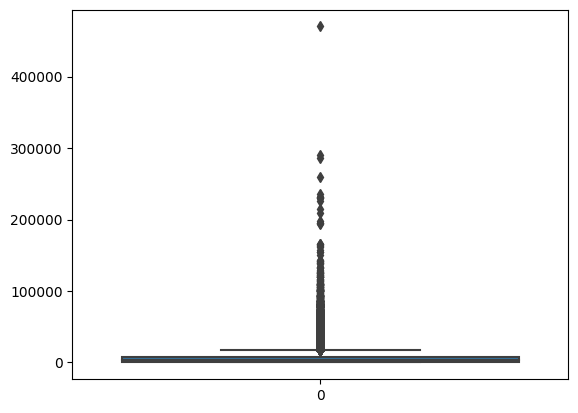

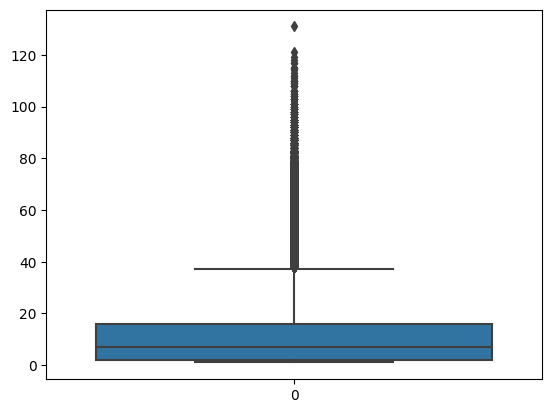

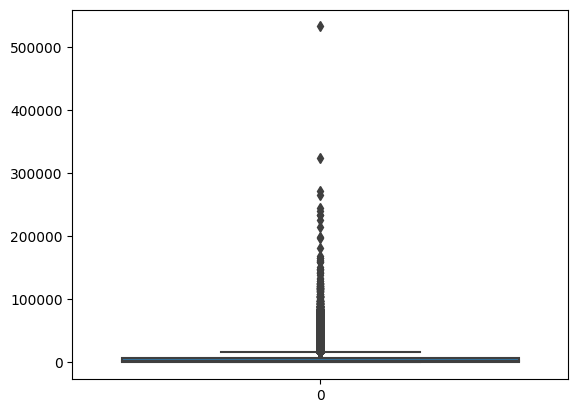

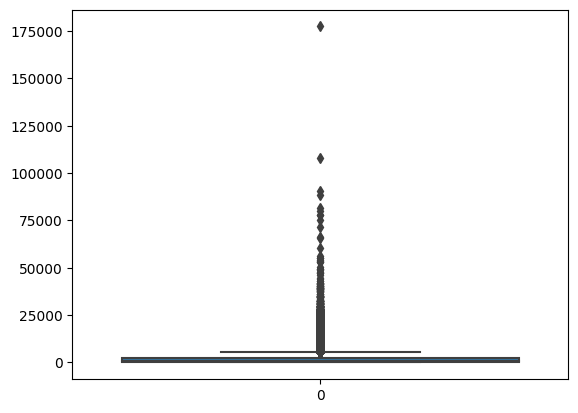

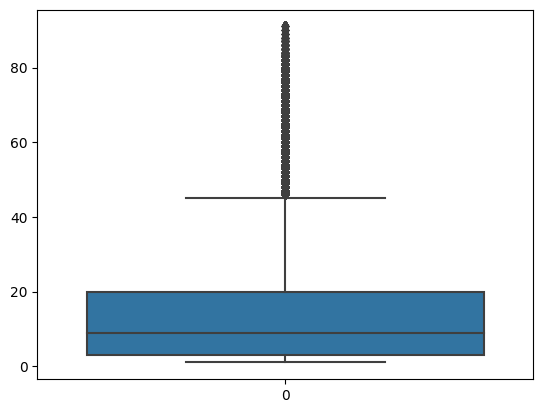

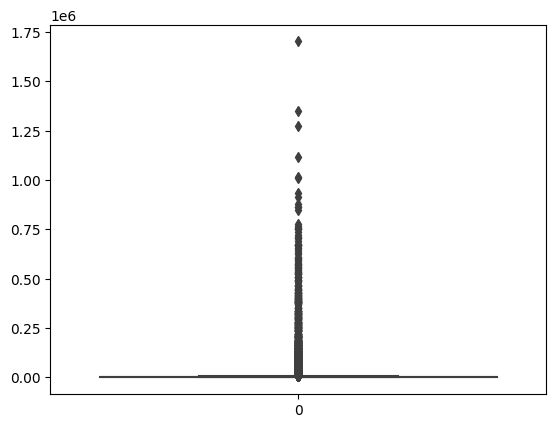

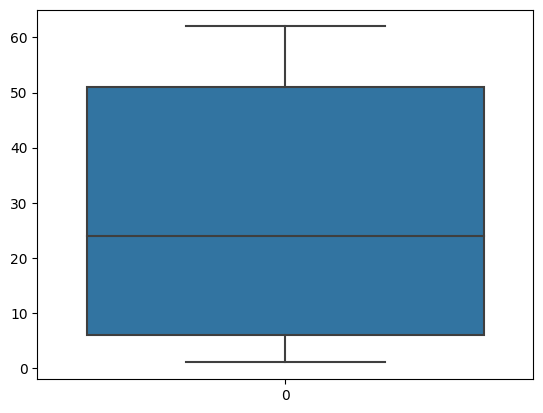

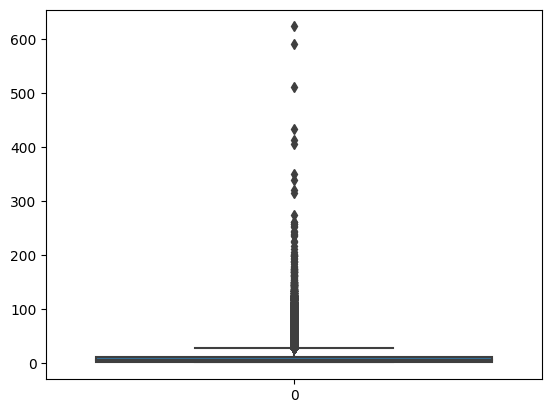

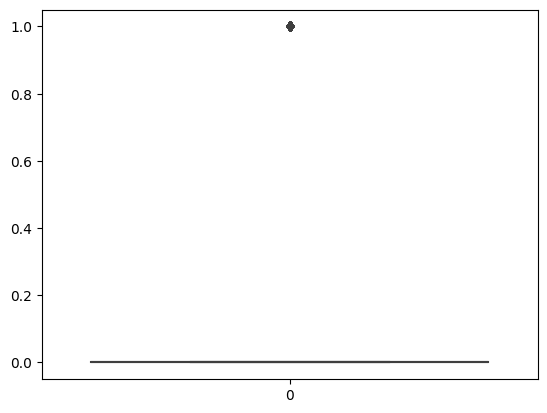

In [11]:
 # Set up to calculate the outliers
for column in dataset[numerics]:
  sns.boxplot(dataset[column])
  plt.show()

From the boxplots, we notice that with the exception of "regularity" and "churn" (which has only 2 values), all the other columns have significant outliers. These are likely to skew the mean, as such, the missing values in those columns will be filled with their respective medians, which are much less likely to be affected by outliers.

In [12]:
# Fill the numeric columns with the mean values
dataset["montant"].fillna((dataset["montant"].mean()), inplace=True)
dataset["frequence_rech"].fillna((dataset["frequence_rech"].mean()), inplace=True)
dataset["arpu_segment"].fillna((dataset["arpu_segment"].mean()), inplace=True)
dataset["frequence"].fillna((dataset["frequence"].mean()), inplace=True)
dataset["data_volume"].fillna((dataset["data_volume"].mean()), inplace=True)
dataset["freq_top_pack"].fillna((dataset["freq_top_pack"].mean()), inplace=True)

In [13]:
# Confirm filling of columns with the percentages of missing values
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({"percent_missing": percent_missing})
missing_value_df.sort_values("percent_missing", inplace=True)
missing_value_df

,percent_missing
user_id,0.00000
tenure,0.00000
montant,0.00000
frequence_rech,0.00000
arpu_segment,0.00000
frequence,0.00000
data_volume,0.00000
mrg,0.00000
regularity,0.00000
freq_top_pack,0.00000


In [14]:
# Check the value counts of the churn column
dataset["churn"].value_counts(normalize = True)

0   0.81245
1   0.18755
Name: churn, dtype: float64

In [15]:
# Check the value counts of the top_pack column
dataset["top_pack"].value_counts(normalize = True)

All-net 500F=2000F;5d            0.25359
On net 200F=Unlimited _call24H   0.12186
Data:490F=1GB,7d                 0.09212
Data: 100 F=40MB,24H             0.06790
Mixt 250F=Unlimited_call24H      0.05370
                                   ...  
150=unlimited pilot auto         0.00000
FIFA_TS_weekly                   0.00000
Data_Mifi_10Go_Monthly           0.00000
Data_Mifi_20Go                   0.00000
200=unlimited pilot auto         0.00000
Name: top_pack, Length: 126, dtype: float64

### 4.2 Exploration of Categorical Columns

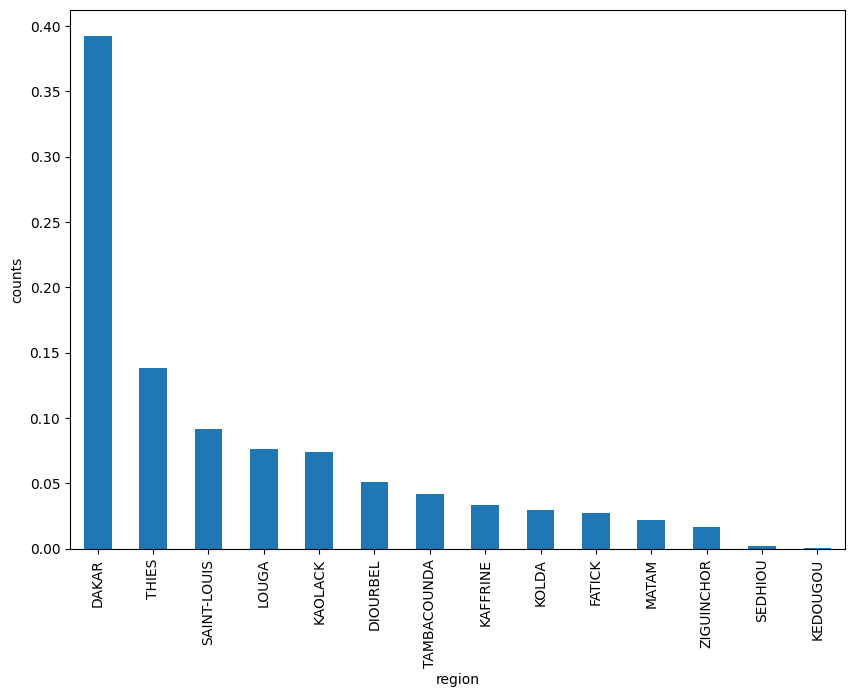

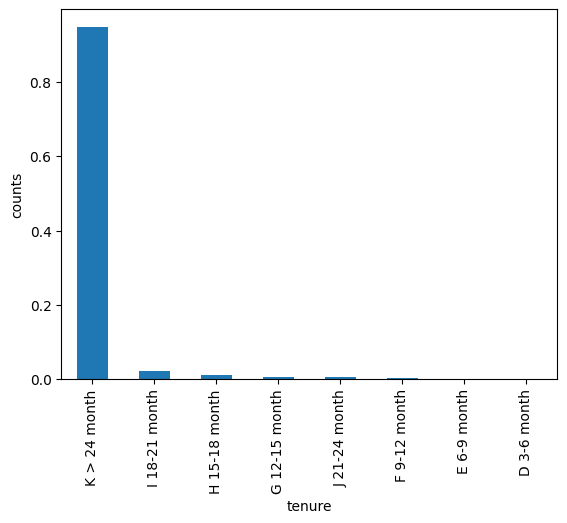

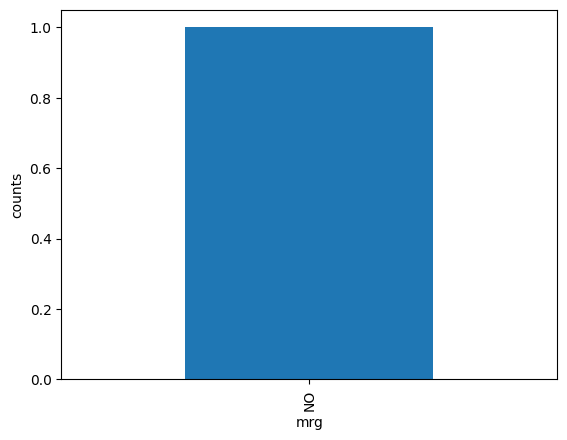

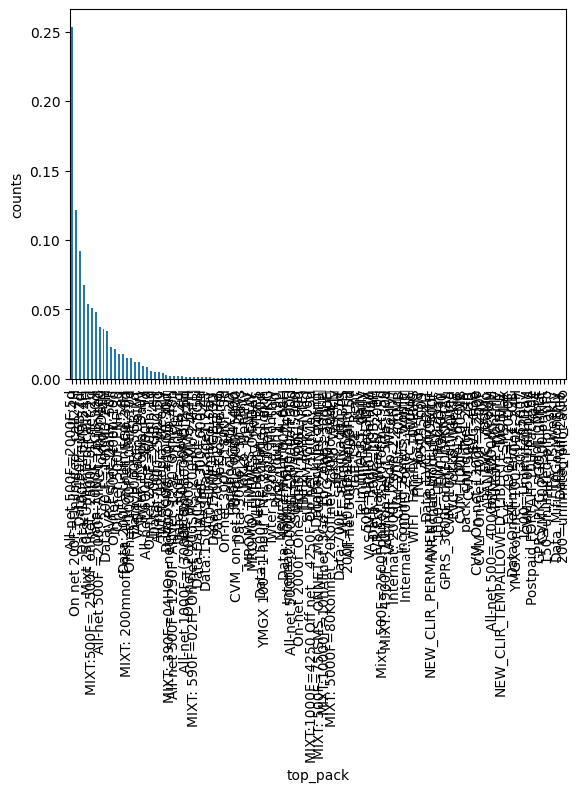

In [16]:
# Visualizing the distribution of the columns with categorical values and their churn levels
categoricals = [column for column in dataset.columns if (dataset[column].dtype == "O")]
categoricals.remove("user_id")

plt.figure(figsize=(10,7))
for column in dataset[categoricals].columns:
  # Visualize the distribution of the categories in the column
  dataset[column].value_counts(normalize=True).plot(kind='bar')
  plt.ylabel('counts')
  plt.xlabel(column)
  plt.show()
  print("\n")

In [17]:
# Confirm filling of columns with the percentages of missing values
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({"percent_missing": percent_missing})
missing_value_df.sort_values("percent_missing", inplace=True)
missing_value_df

,percent_missing
user_id,0.00000
tenure,0.00000
montant,0.00000
frequence_rech,0.00000
arpu_segment,0.00000
frequence,0.00000
data_volume,0.00000
mrg,0.00000
regularity,0.00000
freq_top_pack,0.00000


In [18]:
# Confirm the unique values of the mrg column
dataset["mrg"].value_counts()

NO    1077024
Name: mrg, dtype: int64

## Univariate Analysis
in this section we will explore, analyze, visualize each variable independently of the others.

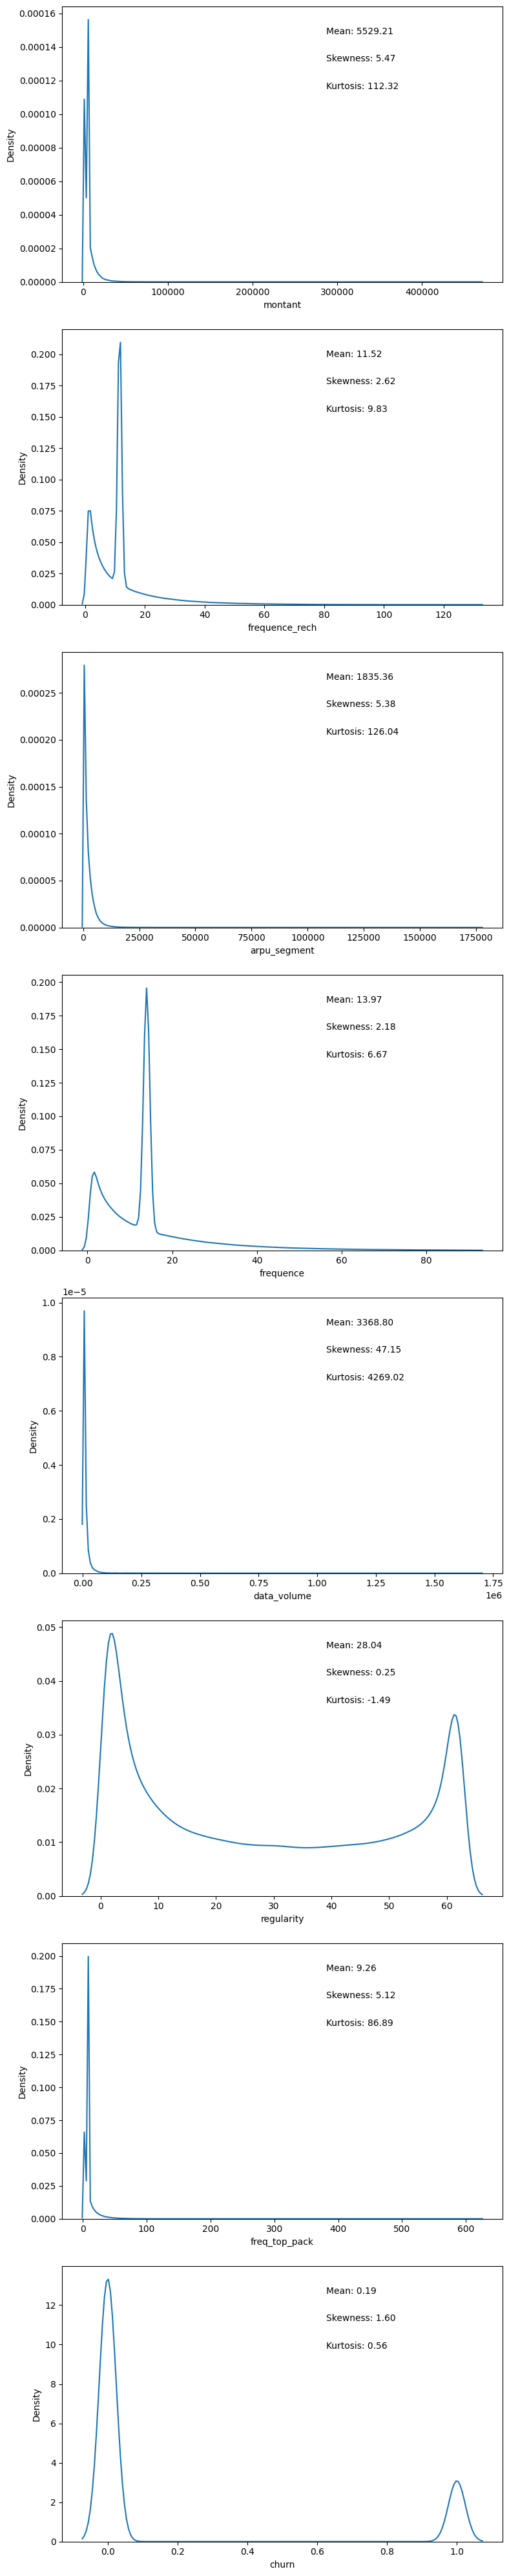

In [70]:
# Extracting all numerical variables
num_cols = dataset.select_dtypes(include=['int64','float64']).columns

# Plot KDEs(kernel density estimation) for all numerical columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 40))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=dataset, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate mean, skewness, and kurtosis
    mean_val = dataset[col].mean()
    skewness_val = dataset[col].skew()
    kurtosis_val = dataset[col].kurtosis()

    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

In [71]:
dataset.columns

Index(['tenure', 'montant', 'frequence_rech', 'arpu_segment', 'frequence',
       'data_volume', 'regularity', 'freq_top_pack', 'churn'],
      dtype='object')

In [84]:
import matplotlib.ticker as mtick

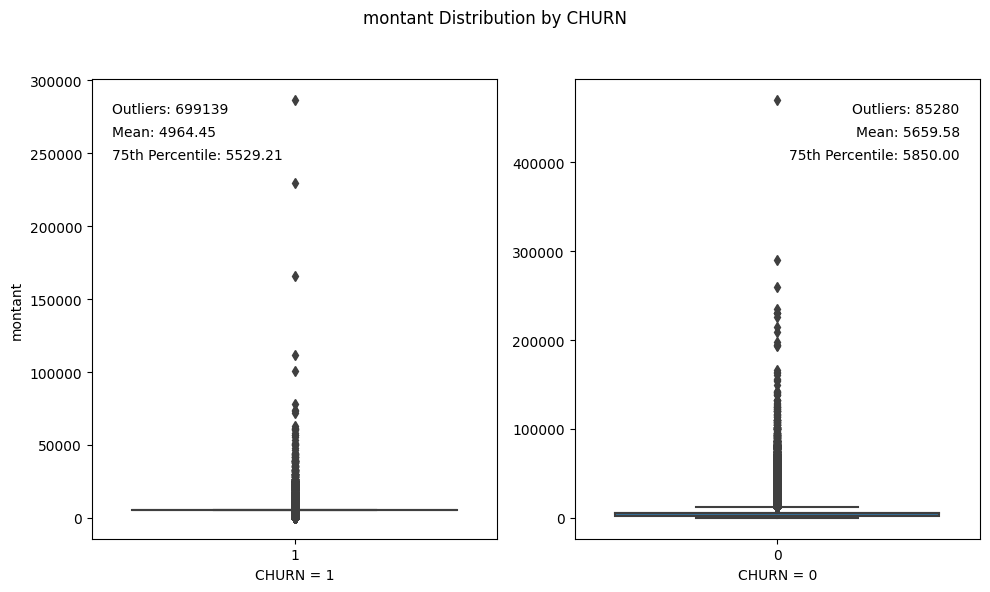

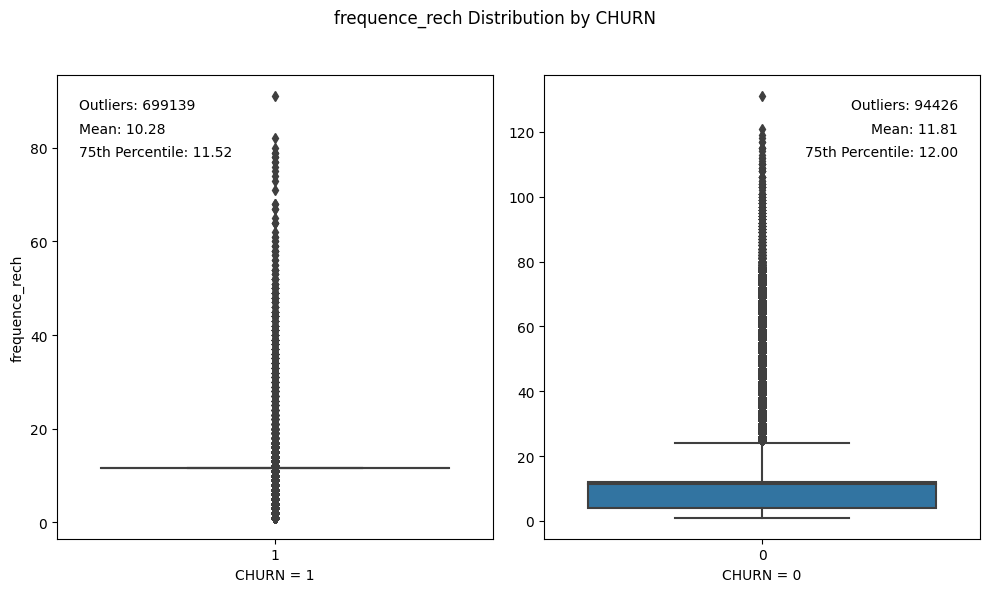

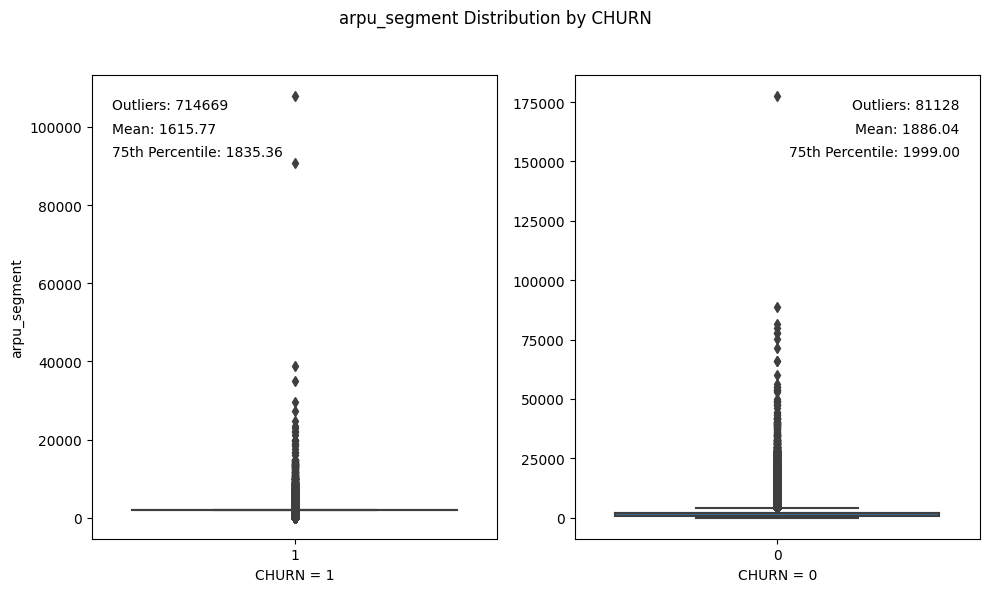

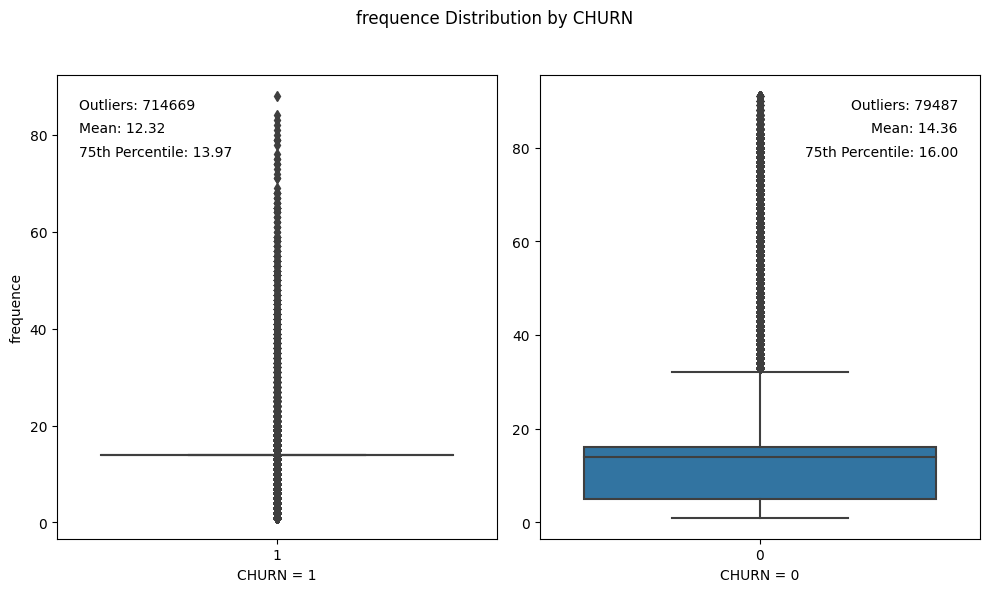

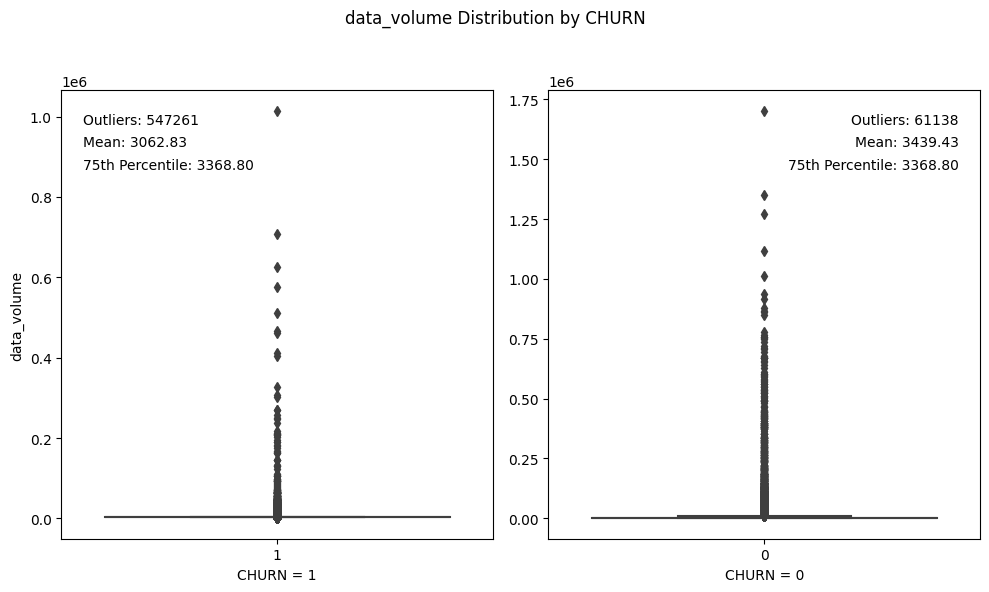

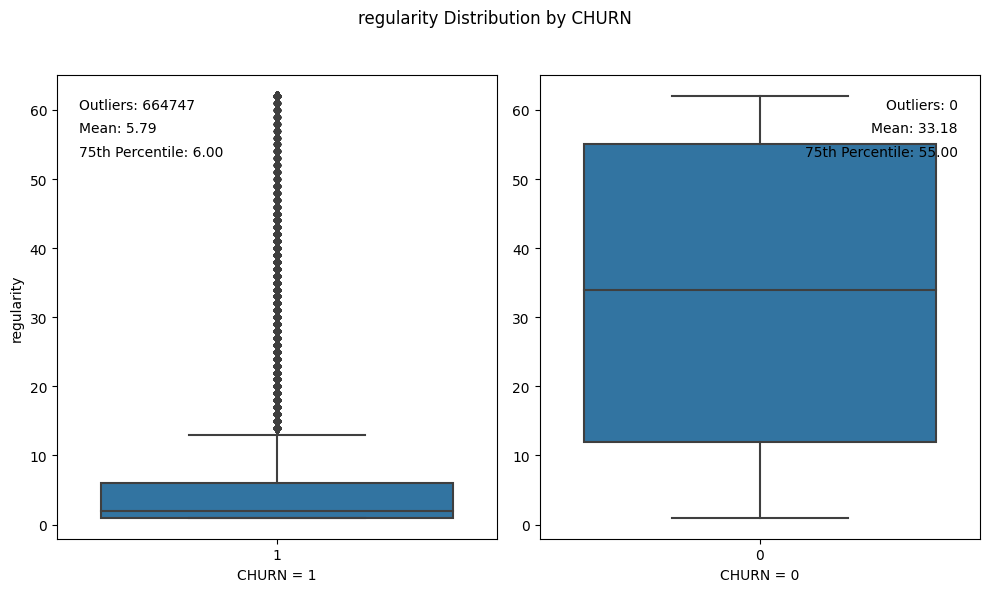

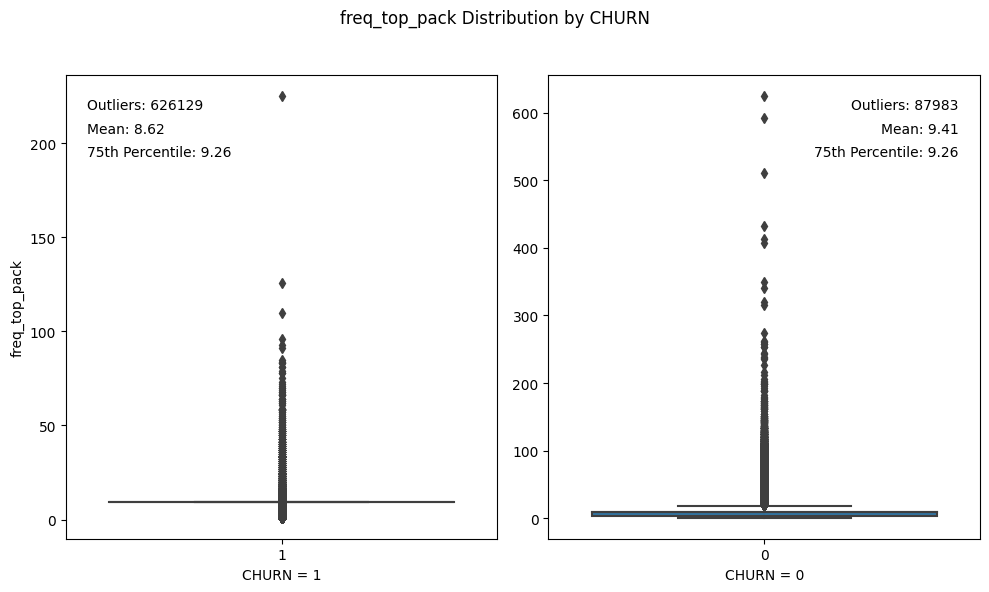

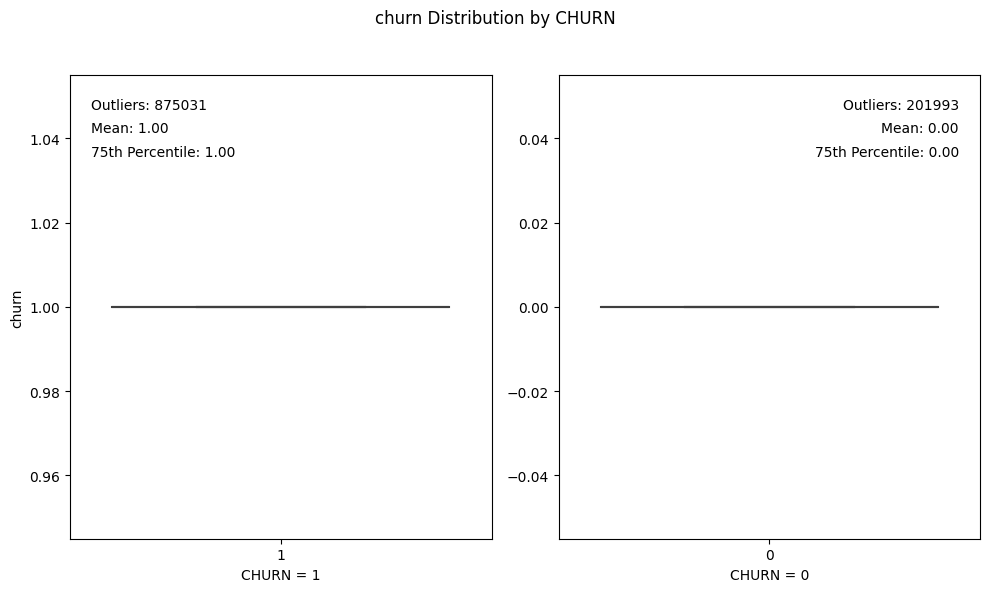

In [82]:
# Extracting all numerical variables
for col in num_cols:
    plt.figure(figsize=(10, 6))

    # Plot boxplot for churn = 1
    plt.subplot(1, 2, 1)
    sns.boxplot(data=dataset[dataset['churn'] == 1], x='churn', y=col)
    q75_1 = dataset[dataset['churn'] == 1][col].quantile(0.75)
    q25_1 = dataset[dataset['churn'] == 1][col].quantile(0.25)
    iqr_1 = q75_1 - q25_1
    outliers_1 = dataset[(dataset[col] < q25_1 - 1.5 * iqr_1) | (dataset[col] > q75_1 + 1.5 * iqr_1)][col]
    num_outliers_1 = len(outliers_1)
    plt.text(0.05, 0.95, f"Outliers: {num_outliers_1}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, f"Mean: {dataset[dataset['churn'] == 1][col].mean():.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f"75th Percentile: {q75_1:.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 1')
    plt.ylabel(col)

    # Plot boxplot for churn = 0
    plt.subplot(1, 2, 2)
    sns.boxplot(data=dataset[dataset['churn'] == 0], x='churn', y=col)
    q75_0 = dataset[dataset['churn'] == 0][col].quantile(0.75)
    q25_0 = dataset[dataset['churn'] == 0][col].quantile(0.25)
    iqr_0 = q75_0 - q25_0
    outliers_0 = dataset[(dataset[col] < q25_0 - 1.5 * iqr_0) | (dataset[col] > q75_0 + 1.5 * iqr_0)][col]
    num_outliers_0 = len(outliers_0)
    plt.text(0.95, 0.95, f"Outliers: {num_outliers_0}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.90, f"Mean: {dataset[dataset['churn'] == 0][col].mean():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f"75th Percentile: {q75_0:.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 0')
    plt.ylabel('')

    plt.suptitle(f'{col} Distribution by CHURN')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Answering Business Questions

## 1. What is the Company’s overall churn rate throughout the observed period?

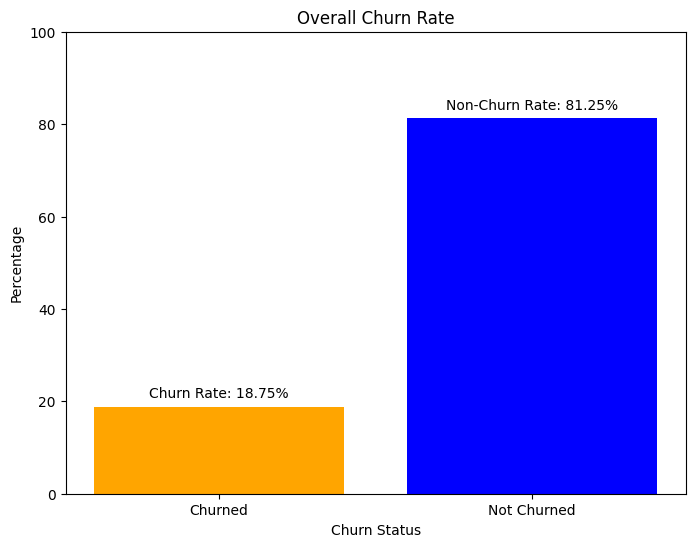

In [86]:
# Calculate the overall churn rate
churn_rate = dataset['churn'].mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Not Churned'], [churn_rate, 100 - churn_rate], color=['orange', 'blue'])
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.title('Overall Churn Rate')
plt.ylim(0, 100)
plt.text(0, churn_rate + 2, f'Churn Rate: {churn_rate:.2f}%', ha='center')
plt.text(1, 100 - churn_rate + 2, f'Non-Churn Rate: {100 - churn_rate:.2f}%', ha='center')

plt.show()

The churn rate is a measure of the percentage of customers who stopped using a company's product or service during a specific time period. In this case, the observed period is not specified, but it seems to be the duration covered by the dataset.

The given result indicates that the company's overall churn rate is 18.82% while the percentage of those who did not churn is 81.18%. This means that, during the observed period, approximately 18.82% of the customers in the dataset stopped using the telecom company's services and became inactive.

A churn rate of 18.82% suggests that a significant portion of customers decided to discontinue their relationship with the company during the specified time frame. This could be due to various reasons such as dissatisfaction with services, competitive offerings, or changes in customer needs.


## 2. Are there particular regions that exhibit a higher churn rate than others?

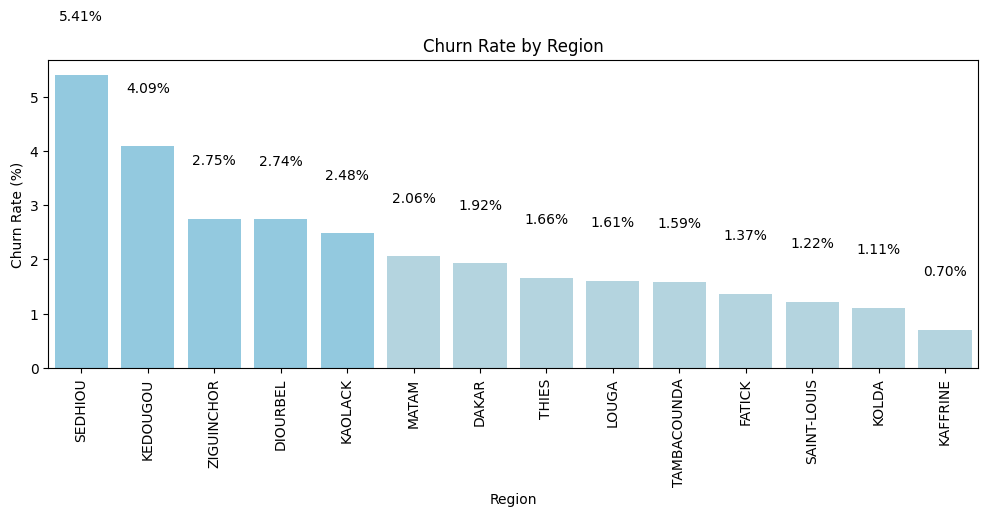

In [90]:
# Calculate the churn rate by region
churn_rate_by_region = train.groupby('REGION')['CHURN'].mean() * 100

# Sort the regions by churn rate in descending order
sorted_regions = churn_rate_by_region.sort_values(ascending=False)

# Define colors for the bars
colors = ['skyblue' if rate > sorted_regions.mean() else 'lightblue' for rate in sorted_regions]

# Create a bar plot
plt.figure(figsize=(12, 4))
sns.barplot(x=sorted_regions.index, y=sorted_regions, palette=colors)
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Region')

# Add labels to the bars
for i, rate in enumerate(sorted_regions):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=90)
plt.show()

The provided result indicates that different regions have varying churn rates, with Sedhiou having the highest churn rate of 6.45%, followed by Ziguinchor with 4.26%, and Diourbel with 3.08%. It's interesting to note that Kedougou has a churn rate of 0%.

The churn rate could be attributed to the following reasons:

1. **Local Market Dynamics:**
   - The telecom market can vary significantly from one region to another. Local competition, customer preferences, and economic factors can influence customer behavior.

2. **Service Quality:**
   - Regions with higher churn rates may be experiencing issues related to service quality, network coverage, or customer support. Conversely, areas with lower churn rates might have better-perceived service quality.

3. **Competitive Landscape:**
   - High churn rates in specific regions could be a result of aggressive competition from other telecom providers. Customers might be switching to competitors for better deals or services.

4. **Economic Factors:**
   - Economic conditions in different regions can impact customers' willingness to continue or switch telecom providers. Regions with economic challenges might see higher churn rates.

5. **Customer Demographics:**
   - Demographic factors such as age, income levels, or technological adoption rates can vary across regions, influencing how customers perceive and use telecom services.

As for Kedougou having a churn rate of 0%, it could be due to a variety of reasons:

- **Low Customer Base:**
  - If Kedougou has a relatively small customer base, the churn rate might appear as 0% because there are no instances of customers churning in the observed dataset.

- **Stable Customer Behavior:**
  - Customers in Kedougou may exhibit stable and consistent behavior, leading to a lack of churn during the observed period.

- **Data Limitations:**
  - It's also possible that the dataset might not capture all relevant information, and there may be missing data or factors influencing churn that are not accounted for.

## 3 Which tenure are likely to churn more are compared to the average rate of churn?

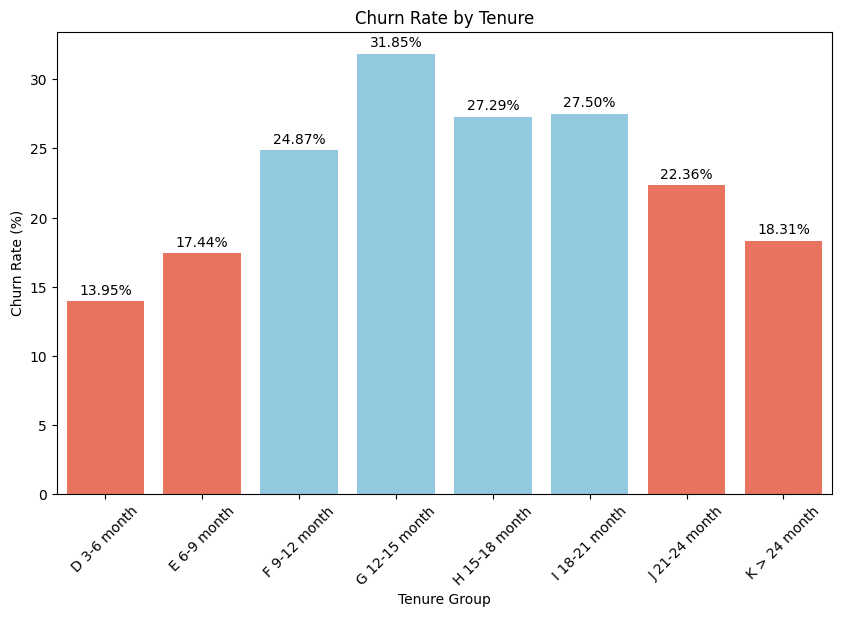

In [91]:
# Calculate the churn rate by tenure group
churn_rate_by_tenure = train.groupby('TENURE')['CHURN'].mean() * 100

# Sort the tenure groups in ascending order
sorted_tenure = churn_rate_by_tenure.sort_index()

# Define colors for the bars
colors = ['tomato' if rate < sorted_tenure.mean() else 'skyblue' for rate in sorted_tenure]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_tenure.index, y=sorted_tenure, palette=colors)
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')

# Add labels to the bars
for i, rate in enumerate(sorted_tenure):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()


The graph shows that customers with a tenure in the range of G 12-15 months have the highest churn rate at 32.14%, followed by H 15-18 months with 27.83%, and I 18-21 months with 27.25%. Let's explore potential explanations for these observations:

1. **Transition Period:**
   - Customers in the G 12-15 month range might be going through a critical transition period. It's a phase where initial enthusiasm or promotional benefits may wear off, and customers reassess the value they derive from the telecom services.

2. **Competitive Offers:**
   - During the 12-18 month tenure range, customers may start receiving offers from competitors. These offers could entice them to switch providers, contributing to the higher churn rates.

3. **Service Satisfaction:**
   - Customers in the G, H, and I tenure ranges might have experienced a peak in service dissatisfaction or encountered issues that influence their decision to churn. Identifying and addressing these pain points can be crucial in reducing churn.

4. **Promotional Period End:**
   - Initial sign-up promotions or discounted rates often end after the first year. Customers who joined for promotional benefits might be more likely to churn after this period.

5. **Market Dynamics:**
   - The telecom market might have specific dynamics during these tenure ranges, with increased competition or changing customer preferences.

4. ## Is there a relationship between the top-up amount (MONTANT) and the churn rate?

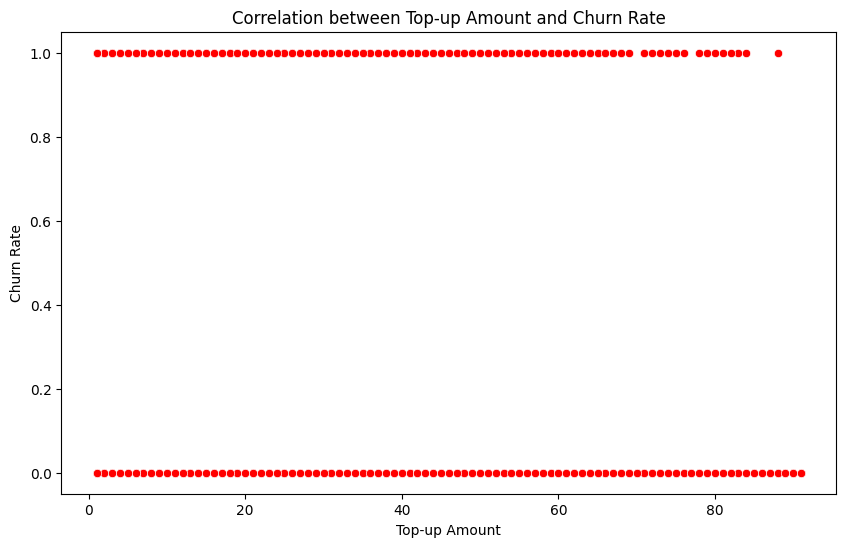

In [92]:
# Plot correlation between top-up amount and churn rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='FREQUENCE', y='CHURN',  color='red')
plt.title('Correlation between Top-up Amount and Churn Rate')
plt.xlabel('Top-up Amount')
plt.ylabel('Churn Rate')
plt.show()

The observation from the scatter plot that there is no apparent relationship between the top-up amount (MONTANT) and the churn rate suggests that, based on the visual representation, there is no clear trend or correlation between these two variables.

This could be due to:
1. **Diverse Customer Behavior:**
   - Customers may have varied preferences and reasons for topping up their accounts, and these reasons might not necessarily correlate with their likelihood to churn. Factors influencing churn could be more complex and multifaceted.

2. **Other Influencing Factors:**
   - Churn is likely influenced by a combination of factors such as service quality, customer satisfaction, and competitive offerings. The top-up amount alone may not capture these complex dynamics.


5. Is there a reduced likelihood of churn among customers who frequently activate specific top-pack packages (TOP_PACK)?

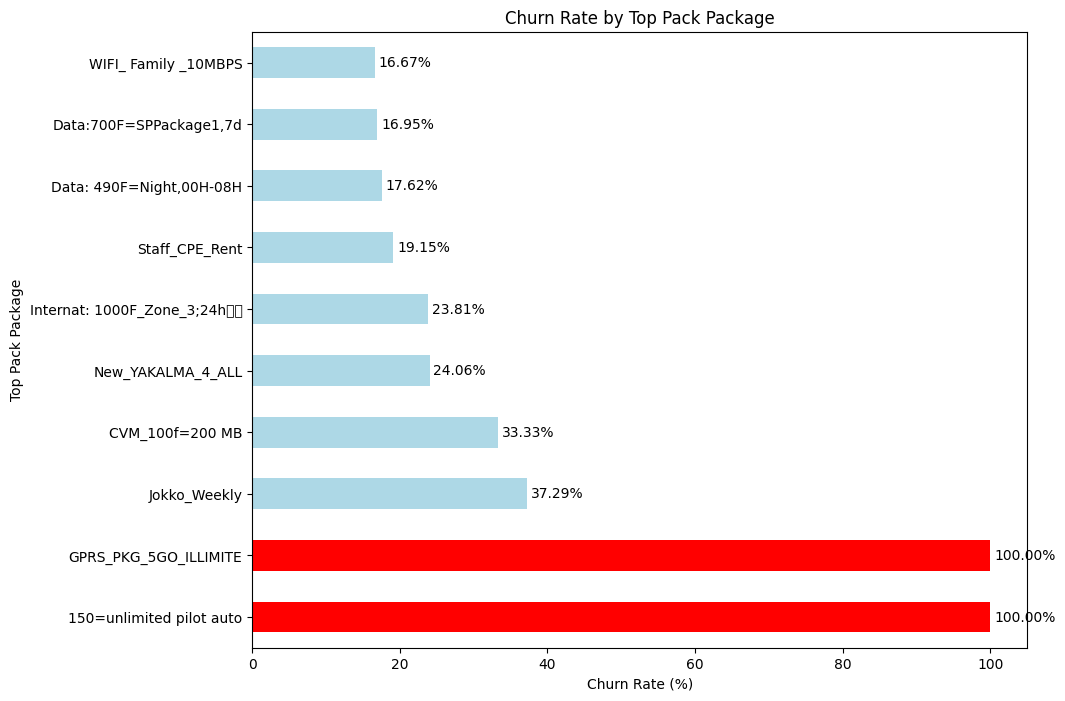

In [93]:
# Calculate the churn rate by top pack packages
churn_rate_by_top_pack = train.groupby('TOP_PACK')['CHURN'].mean() * 100

# Sort the churn rates in descending order and select the top 10
churn_rate_by_top_pack = churn_rate_by_top_pack.sort_values(ascending=False).head(10)

# Define colors for the bars
colors = ['red' if rate > churn_rate_by_top_pack.mean() else 'lightblue' for rate in churn_rate_by_top_pack]

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = churn_rate_by_top_pack.plot(kind='barh', color=colors)
plt.xlabel('Churn Rate (%)')
plt.ylabel('Top Pack Package')
plt.title('Churn Rate by Top Pack Package')

# Add labels to the bars
for i, rate in enumerate(churn_rate_by_top_pack):
    plt.text(rate + 0.5, i, f'{rate:.2f}%', va='center')

plt.show()

The observation that specific top-pack packages, such as "all-net 500F=4000F;5d," "jokko_weekly," "Internat," "staff_cpe_rent," and "datapack_incoming," have high churn rates of 33.33% suggests that, for customers activating these particular packages, there is a higher likelihood of churning compared to the average churn rate.

This could be due to:

1. **Mismatched Expectations:**
   - Customers subscribing to these specific packages might have expectations that are not met after activation. If the services or benefits provided by these packages do not align with customer expectations, it could lead to dissatisfaction and churn.

2. **Service Quality Issues:**
   - The packages with high churn rates might be associated with services or features that are prone to issues or dissatisfaction. Customers experiencing problems with the activated packages may be more likely to churn.

3. **Competitive Offerings:**
   - High-churn packages might face strong competition from other providers offering similar or better packages. Customers might be attracted to better deals from competitors, contributing to higher churn rates.

4. **Limited Appeal:**
   - The specific packages might have a limited appeal or relevance to the customer base, leading to a higher likelihood of churn after activation.


6. ## Do customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning?

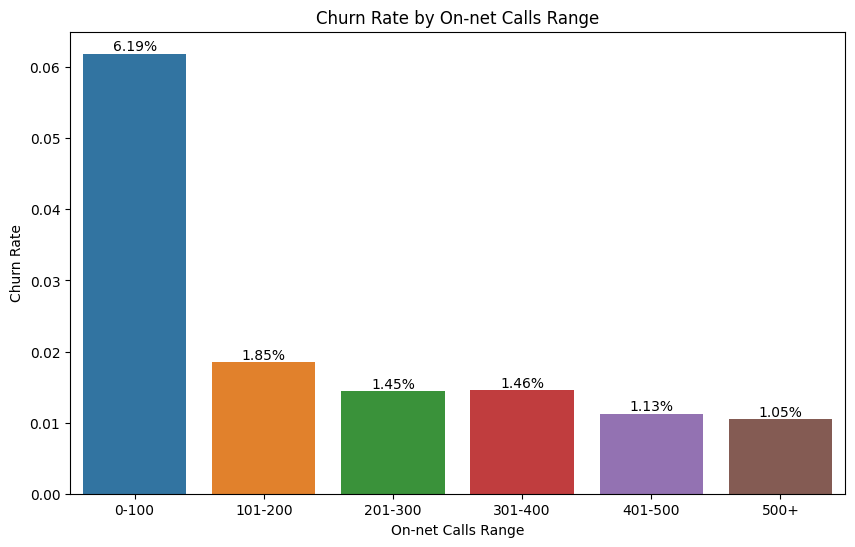

In [94]:
# Create bins for ON_NET
labels = pd.cut(train['ON_NET'], bins=[0, 100, 200, 300, 400, 500, float('inf')],
                labels=['0-100', '101-200', '201-300', '301-400', '401-500', '500+'])

# 'labels' now contains the bin labels for each value in 'ON_NET'

# Calculate the churn rate for different ranges of on-net calls
churn_rate_by_onnet_range = train.groupby(labels)['CHURN'].mean()

# Plot the churn rate for different ranges of on-net calls
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_onnet_range.index, y=churn_rate_by_onnet_range.values)
plt.title('Churn Rate by On-net Calls Range')
plt.xlabel('On-net Calls Range')
plt.ylabel('Churn Rate')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    percentage = f'{height * 100:.2f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom')

plt.show()


The observation from the bar graph that customers with a higher volume of on-net calls (ON_NET) demonstrate a lower likelihood of churning suggests a potential correlation between on-net call usage and customer loyalty. This could be due to:

1. **Network Loyalty:**
   - Customers making a higher volume of on-net calls may be more loyal to the telecom company's network. On-net calls typically involve communication within the same network, and customers who frequently use this feature may be more invested in the services provided by the company.

2. **Social Circle:**
   - On-net calls often involve communication with friends, family, or colleagues who are also on the same network. Customers with a strong social circle within the same network may have a higher sense of community and may be less inclined to switch providers.

3. **Network Quality Perception:**
   - Higher on-net call usage might indicate a positive perception of the network quality. If customers find the on-net calls reliable and of good quality, they may be less likely to explore alternative providers.

4. **Bundled Services:**
   - Customers who frequently use on-net calls may be subscribers to bundled services that include additional benefits for on-net communication. Bundled offerings can enhance customer satisfaction and loyalty.

5. **Cost Savings:**
   - On-net calls are often more cost-effective for customers, as they may be included in certain packages or have lower rates. The perceived cost savings may contribute to customer satisfaction and loyalty.


## 7. Is there a disparity in churn rates between customers who regularly refill their accounts (FREQUENCE_RECH) and those who refill less frequently?

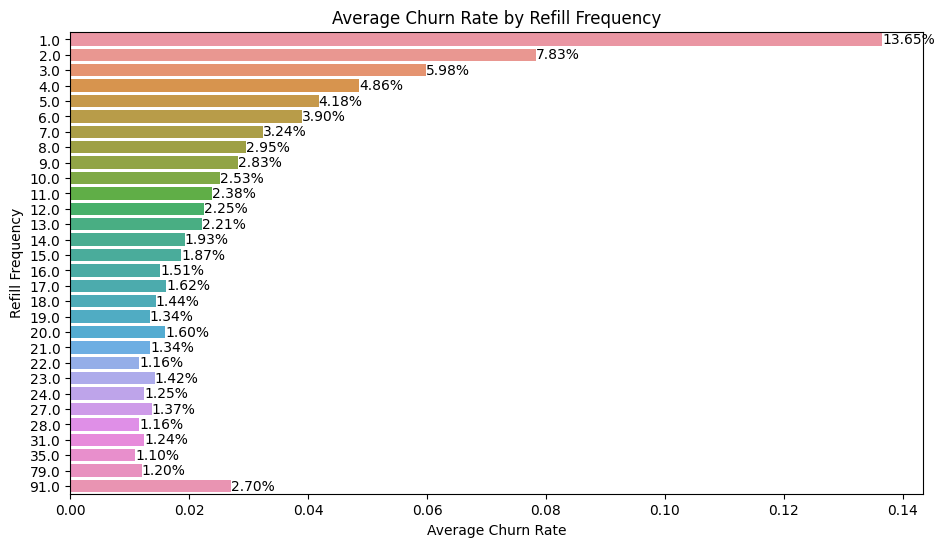

In [95]:
# Calculate the average churn rate for different categories of refill frequency
avg_churn_rate = train.groupby('FREQUENCE_RECH')['CHURN'].mean().sort_values(ascending=False).head(30)

# Plot the average churn rate for different refill frequency categories
plt.figure(figsize=(11, 6))
sns.barplot(x=avg_churn_rate.values, y=avg_churn_rate.index, orient='horizontal')
plt.title('Average Churn Rate by Refill Frequency')
plt.xlabel('Average Churn Rate')
plt.ylabel('Refill Frequency')

# Add labels to the bars
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    percentage = f'{width * 100:.2f}%'
    ax.text(width, bar.get_y() + bar.get_height() / 2, percentage, ha='left', va='center')

plt.show()


The observation from the graph that customers who refill their accounts with different frequencies exhibit varying churn rates suggests a potential correlation between refill frequency (FREQUENCE_RECH) and the likelihood of churning. This could be as a result of:

1. **Engagement and Loyalty:**
   - Customers who frequently refill their accounts may be more engaged with the telecom services and demonstrate a higher level of loyalty. Regular refills may indicate an ongoing commitment to using the services.

2. **Promotional Incentives:**
   - Customers with a higher refill frequency might be benefiting from promotional incentives or loyalty programs tied to frequent refills. These incentives can contribute to customer retention.

3. **Service Dependence:**
   - Customers who rely heavily on the telecom services may need to refill more frequently. This dependence on the services could lead to a lower likelihood of churning as they have a continuous need for the services.

4. **Financial Commitment:**
   - Frequent refills might suggest a financial commitment to the telecom services. Customers who invest more in the services may be less likely to switch providers due to the perceived value.

5. **Behavioral Patterns:**
   - Different customer segments may have distinct behavioral patterns related to refill frequency. Understanding these patterns can help tailor retention strategies to specific customer needs.

## 5.0 Feature Engineering
### 5.1 Feature Encoding

In [19]:
# Looking at the unique values in each column
dataset.nunique()

user_id           1077024
region                 14
tenure                  8
montant              4358
frequence_rech        120
revenue             31810
arpu_segment        14063
frequence              92
data_volume         32460
mrg                     1
regularity             62
top_pack              126
freq_top_pack         207
churn                   2
dtype: int64

**Initial columns to drop**
- Due to the *low variability* of the "mrg" column, it will be dropped.
- For the opposite reason - *too much variability* - the "top_pack" column will also be dropped
- The "region" column is also a big risk since it is likely to add a lot of dimensionality to the work, and may cause a significant slowdown in training. It will also be dropped in the meantime.
- The above will be dropped along with the "user_id" which is unique for every user, and will not provide any useful information to the models.

In [20]:
# Drop the useless columns
dataset.drop(columns = ["user_id", "mrg", "top_pack", "region", "revenue"], inplace = True)

In [21]:
# Encode the TENURE column
l_encoder = LabelEncoder()
dataset["tenure"] = l_encoder.fit_transform(dataset["tenure"])

In [22]:
# Create a copy of the dataset
complete_set = dataset.copy()
complete_set.head()

,tenure,montant,frequence_rech,arpu_segment,frequence,data_volume,regularity,freq_top_pack,churn
0,7,20000.00000,47.00000,7201.00000,52.00000,8835.00000,62,30.00000,0
1,7,5529.21090,11.52376,1835.35596,13.97444,3368.80172,3,9.26245,0
2,7,5529.21090,11.52376,1835.35596,13.97444,3368.80172,1,9.26245,0
3,7,7900.00000,19.00000,2632.00000,25.00000,9385.00000,61,7.00000,0
4,7,12350.00000,21.00000,4117.00000,29.00000,9360.00000,56,11.00000,0


In [23]:
# View a high-level overview of the dataset
complete_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tenure          1077024 non-null  int32  
 1   montant         1077024 non-null  float64
 2   frequence_rech  1077024 non-null  float64
 3   arpu_segment    1077024 non-null  float64
 4   frequence       1077024 non-null  float64
 5   data_volume     1077024 non-null  float64
 6   regularity      1077024 non-null  int64  
 7   freq_top_pack   1077024 non-null  float64
 8   churn           1077024 non-null  int64  
dtypes: float64(6), int32(1), int64(2)
memory usage: 69.8 MB


### 5.2 Feature Selection

#### 5.2.1 Correlation Matrix

In [24]:
# Looking at the correlation between the variables in the merged dataframe
correlation = pd.DataFrame(complete_set.corr())

# Defining a colourscale for the correlation plot
colorscale = [[0.0, "rgb(255,255,255)"], [0.2, "rgb(255, 255, 153)"],
              [0.4, "rgb(153, 255, 204)"], [0.6, "rgb(179, 217, 255)"],
              [0.8, "rgb(240, 179, 255)"], [1.0, "rgb(255, 77, 148)"]]

# Plotting the Correlation Matrix
fig = px.imshow(correlation,
                text_auto= ".3f",
                aspect= "auto",
                labels= {"color": "Correlation Coefficient"},
                contrast_rescaling= "minmax",
                color_continuous_scale= colorscale
                )
fig.update_xaxes(side="top")
fig.show()

The correlation matrix presents a more comprehensive view on the nature of the relationships between the various variables  in the dataset, but it is not so clear due to the number of features. 

One thing that does stand out is the perfect positive correlation between "revenue" and "arpu_segment". The "arpu_segment" column will therefore be dropped before modelling.

## 6.0 Modelling

In [25]:
# Defining the target & predictor variables
X = complete_set.drop(columns=["churn"])
y = complete_set["churn"]

# Splitting the dataframe into train and test
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state= 24, stratify= y)

In [26]:
# Putt the training dataset together for further splitting and modelling
train_data = X_train.join(y_train, on=X_train.index)
train_data.head()

,tenure,montant,frequence_rech,arpu_segment,frequence,data_volume,regularity,freq_top_pack,churn
252414,7,2250.00000,7.00000,750.00000,8.00000,3368.80172,43,3.00000,0
268753,7,5529.21090,11.52376,1835.35596,13.97444,3368.80172,1,9.26245,1
117153,7,4550.00000,10.00000,1217.00000,11.00000,3368.80172,49,5.00000,0
70341,7,5529.21090,11.52376,1835.35596,13.97444,3368.80172,1,9.26245,1
417693,7,11450.00000,25.00000,4067.00000,37.00000,3368.80172,43,21.00000,0


In [27]:
# What is the shape of the training data?
train_data.shape

(753916, 9)

In [28]:
# Put the eval dataset together for future model evaluation
eval_data = X_eval.join(y_eval, on= X_eval.index)
eval_data.head()

,tenure,montant,frequence_rech,arpu_segment,frequence,data_volume,regularity,freq_top_pack,churn
479752,7,3300.00000,12.00000,1132.00000,13.00000,0.00000,51,10.00000,0
652536,7,5529.21090,11.52376,1835.35596,13.97444,3368.80172,1,9.26245,0
21009,7,500.00000,1.00000,333.00000,5.00000,0.00000,42,9.26245,0
977909,7,500.00000,1.00000,167.00000,1.00000,3368.80172,24,1.00000,0
288527,7,3000.00000,6.00000,1000.00000,6.00000,3368.80172,15,6.00000,0


In [29]:
# What is the shape of the test data?
eval_data.shape

(323108, 9)

## Balance the Training Data

In [30]:
# Split the training dataframe for the SMOTE balancing
X = train_data.drop(columns=["churn"])
y = train_data["churn"]

In [31]:
# Resample the training dataframe using SMOTE
smote = SMOTE(sampling_strategy="minority", n_jobs=-1, random_state=24)
X, y = smote.fit_resample(X, y)
y.value_counts()

0    612521
1    612521
Name: churn, dtype: int64

In [32]:
# Apply train_test_split to the SMOTE-sampled training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 24, stratify=y)
y_train.value_counts()

1    428765
0    428764
Name: churn, dtype: int64

In [33]:
# Define the list of columns to scale
numerics.remove("churn")
numerics.remove("revenue")
numerics

['montant',
 'frequence_rech',
 'arpu_segment',
 'frequence',
 'data_volume',
 'regularity',
 'freq_top_pack']

In [34]:
# Scale the numeric columns
scaler = MinMaxScaler()
X_train[numerics] = scaler.fit_transform(X_train[numerics])
X_test[numerics] = scaler.transform(X_test[numerics])

In [35]:
# Define the models
log_reg_model = LogisticRegression(random_state=24)
dt_model = DecisionTreeClassifier(random_state=24)
rf_model = RandomForestClassifier(random_state=24)
xgb_model = XGBClassifier(random_state=24)
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
lgb_model = lgb.LGBMClassifier(random_state=24)

# Create a dictionary of the models
smote_models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": catb_model,
    "LightGBM": lgb_model
}

In [36]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test, 
                                 y_train= y_train, y_test= y_test):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Append model performance results
        results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix, "\n")
        
        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
        print("\n")

        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")
        
        print(f"{name} AUC score: {roc_auc_score(y_test, y_pred)}")

        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc","f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.75      0.81    183757
           1       0.78      0.89      0.83    183756

    accuracy                           0.82    367513
   macro avg       0.83      0.82      0.82    367513
weighted avg       0.83      0.82      0.82    367513
 

Logistic Regressor Confusion Matrix: 
         0       1
0  138060   45697
1   19949  163807 



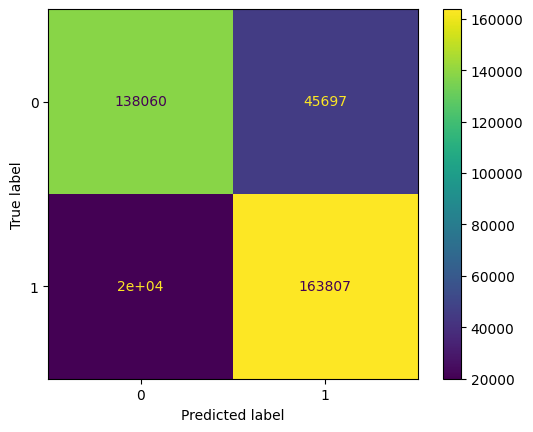

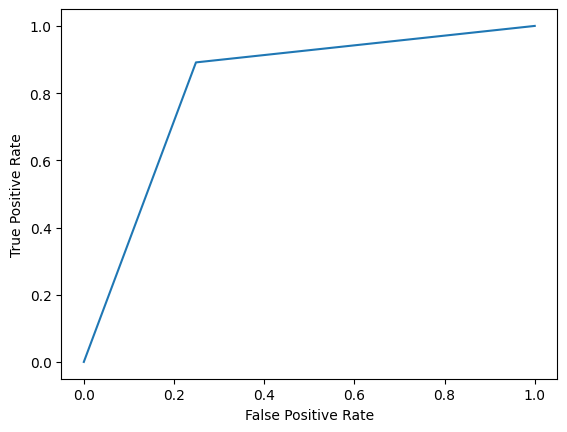



Logistic Regressor AUC score: 0.8213779378134126


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Decision Tree Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84    183757
           1       0.81      0.91      0.86    183756

    accuracy                           0.85    367513
   macro avg       0.85      0.85      0.85    367513
weighted avg       0.85      0.85      0.85    367513
 

Decision Tree Confusion Matrix: 
         0       1
0  143469   40288
1   15622  168134 



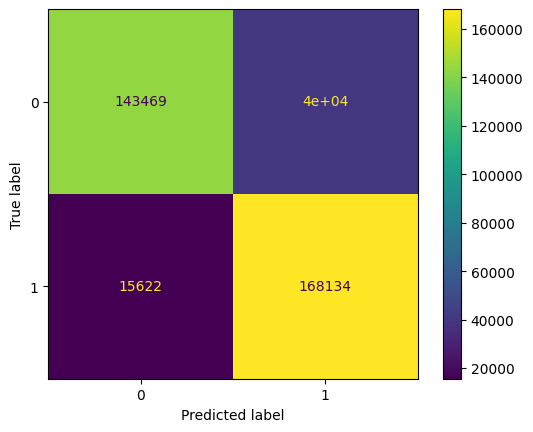

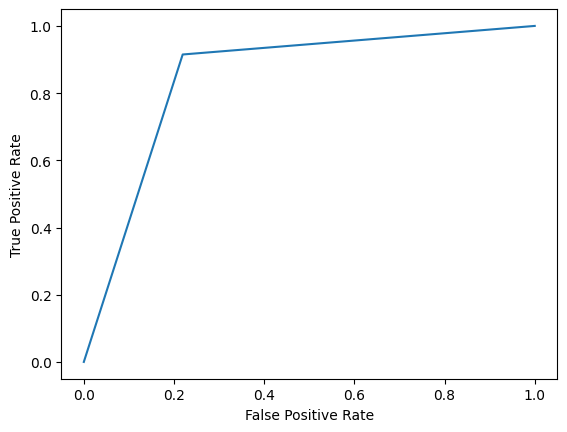



Decision Tree AUC score: 0.8478695096923897


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Random Forest Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86    183757
           1       0.83      0.92      0.87    183756

    accuracy                           0.86    367513
   macro avg       0.87      0.86      0.86    367513
weighted avg       0.87      0.86      0.86    367513
 

Random Forest Confusion Matrix: 
         0       1
0  148616   35141
1   14831  168925 



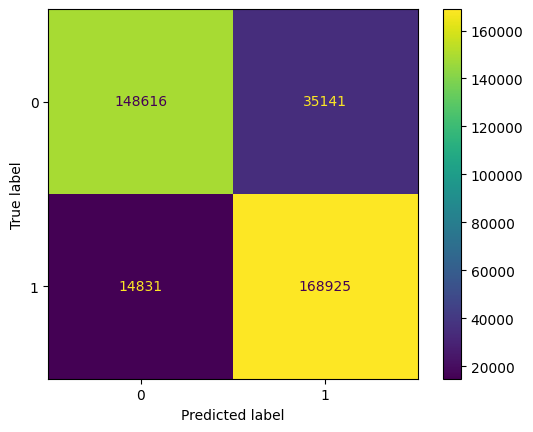

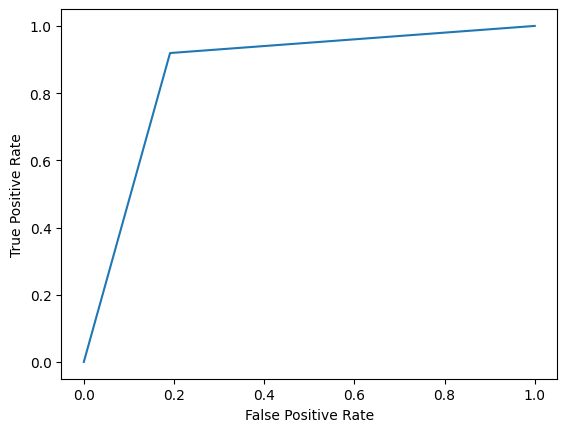



Random Forest AUC score: 0.8640267290217793


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86    183757
           1       0.83      0.92      0.87    183756

    accuracy                           0.87    367513
   macro avg       0.87      0.87      0.86    367513
weighted avg       0.87      0.87      0.86    367513
 

XGBoost Confusion Matrix: 
         0       1
0  149708   34049
1   15491  168265 



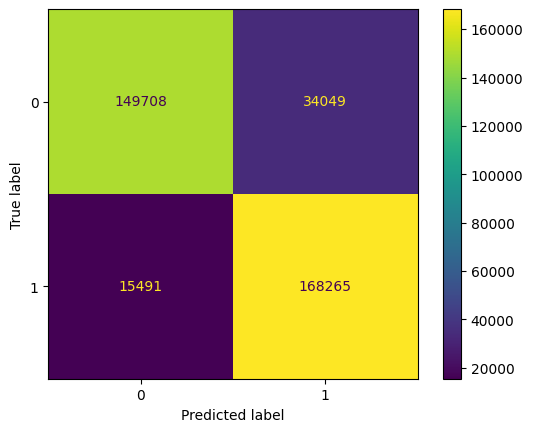

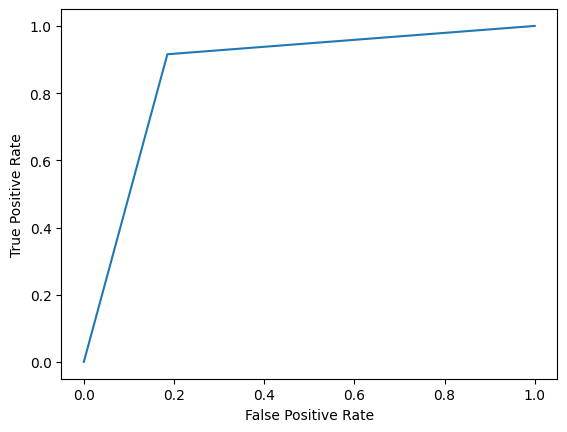



XGBoost AUC score: 0.865202184673212


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Learning rate set to 0.18426
0:	learn: 0.5786175	total: 355ms	remaining: 5m 54s
100:	learn: 0.3246827	total: 20.1s	remaining: 2m 59s
200:	learn: 0.3181299	total: 37.2s	remaining: 2m 27s
300:	learn: 0.3155525	total: 56.3s	remaining: 2m 10s
400:	learn: 0.3139944	total: 1m 14s	remaining: 1m 51s
500:	learn: 0.3128689	total: 1m 30s	remaining: 1m 30s
600:	learn: 0.3120381	total: 1m 47s	remaining: 1m 11s
700:	learn: 0.3111704	total: 2m 3s	remaining: 52.8s
800:	learn: 0.3104259	total: 2m 20s	remaining: 35s
900:	learn: 0.3096992	total: 2m 41s	remaining: 17.7s
999:	learn: 0.3090567	total: 2m 58s	remaining: 0us
CatBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86    183757
           1       0.83      0.92      0.87    183756

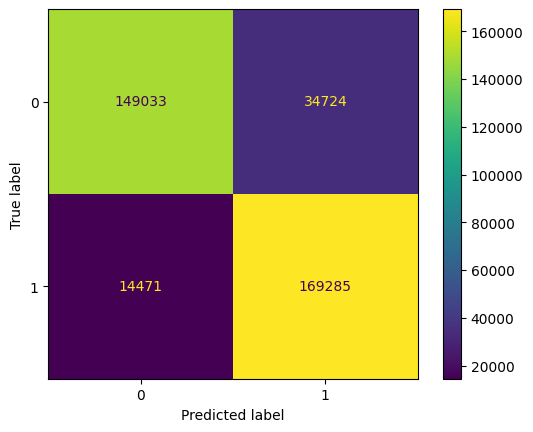

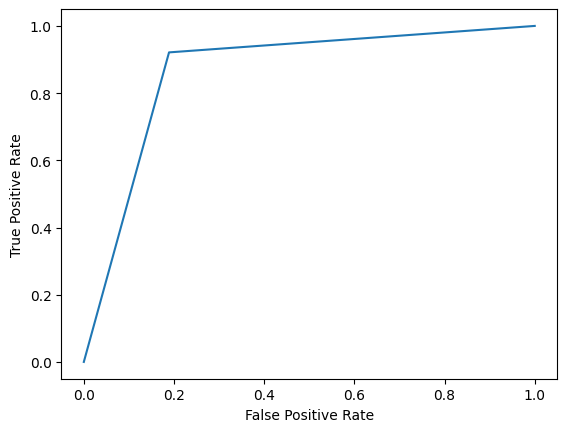



CatBoost AUC score: 0.8661409395256506


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85    183757
           1       0.83      0.91      0.87    183756

    accuracy                           0.86    367513
   macro avg       0.86      0.86      0.86    367513
weighted avg       0.86      0.86      0.86    367513
 

LightGBM Confusion Matrix: 
         0       1
0  148384   35373
1   15930  167826 



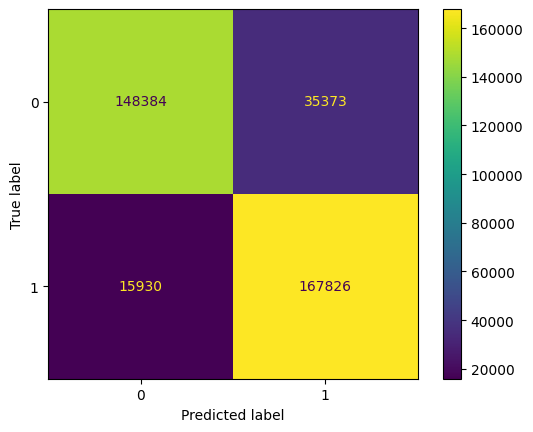

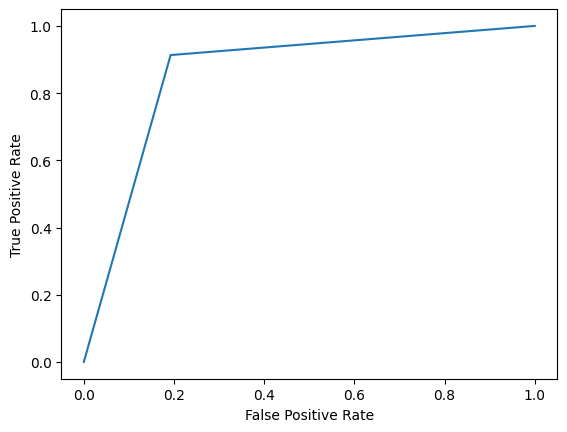



LightGBM AUC score: 0.8604050820076328


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




,precision,recall,f1_score,accuracy,auc
model,,,,,
CatBoost,0.82979,0.92125,0.87313,0.86614,0.86614
XGBoost,0.83170,0.91570,0.87168,0.86520,0.86520
Random Forest,0.82780,0.91929,0.87115,0.86403,0.86403
LightGBM,0.82592,0.91331,0.86742,0.86040,0.86041
Decision Tree,0.80670,0.91499,0.85744,0.84787,0.84787
Logistic Regressor,0.78188,0.89144,0.83307,0.82138,0.82138


In [37]:
# Fit and evaluate the models
model_performances = classification_fit_and_score(smote_models)
model_performances

## Evaluation on the Test Data

In [38]:
# Splitting the test data
test_X = eval_data.drop(columns= ["churn"])
test_y = eval_data["churn"]

In [39]:
# Scale the numeric columns
test_X[numerics] = scaler.transform(test_X[numerics])

In [40]:
# Refit the top models to the training data
## CatBoost Model
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
catb_model.fit(X_train, y_train)

## LightGBM
lgb_model = lgb.LGBMClassifier(random_state=24)
lgb_model.fit(X_train, y_train)

## XGBoost
xgb_model = XGBClassifier(random_state=24)
xgb_model.fit(X_train, y_train)

# Create a dictionary of the top models
select_models = {
    "CatBoost": catb_model,
    "LightGBM": lgb_model,
    "XGBoost": xgb_model
}

Learning rate set to 0.18426
0:	learn: 0.5786175	total: 157ms	remaining: 2m 36s
100:	learn: 0.3246827	total: 20s	remaining: 2m 57s
200:	learn: 0.3181299	total: 40.1s	remaining: 2m 39s
300:	learn: 0.3155525	total: 1m 5s	remaining: 2m 32s
400:	learn: 0.3139944	total: 1m 24s	remaining: 2m 6s
500:	learn: 0.3128689	total: 1m 39s	remaining: 1m 39s
600:	learn: 0.3120381	total: 1m 54s	remaining: 1m 16s
700:	learn: 0.3111704	total: 2m 9s	remaining: 55.1s
800:	learn: 0.3104259	total: 2m 24s	remaining: 35.8s
900:	learn: 0.3096992	total: 2m 39s	remaining: 17.5s
999:	learn: 0.3090567	total: 2m 53s	remaining: 0us


In [41]:
# Defining a helper function to evaluate the models at a go
def model_evaluation(fit_models, X_test, y_test):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)
           
        print("Confusion Matrix for the", name, "model")
        
        # Confusion Matrix
        conf_mat = confusion_matrix(y_test, pred, labels =[0,1])
        conf_mat = pd.DataFrame(conf_mat,columns=["Actual Positive", "Actual Negative"], 
                                index=["Predict Positive", "Predict Negative"])
        

        # Visualize the Confusion Matrix
        f, ax = plt.subplots()
        sns.heatmap(conf_mat,
                    annot= True,
                    linewidth= 1.0,
                    fmt= ".0f",
                    cmap= "RdPu",
                    ax= ax
                   )
        plt.title("The Confusion Matrix of the Predictions")
        plt.show()
        print("\n")


        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")
        print(f"{name} AUC score: {roc_auc_score(y_test, pred)}")
        print("\n")


        lst.append([
            name,
            precision_score(y_test, pred),
            recall_score(y_test, pred),
            f1_score(y_test, pred),
            accuracy_score(y_test, pred),
            roc_auc_score(y_test, pred)
        ])

    
        # Feature importances
        importance = model.feature_importances_
        importance = pd.DataFrame(importance, columns=["score"]).reset_index()
        importance["Feature"] = list(X.columns)
        importance.drop(columns=["index"], inplace=True)

        importance.sort_values(by="score", ascending=False, ignore_index=True, inplace=True)

        # Plotting the feature importances
        fig = px.bar(importance, x="Feature", y="score")
        fig.show()
        
        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")

    eval_df = pd.DataFrame(lst, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc", "f1_score", "accuracy", "recall"], ascending=False, inplace= True)

    return eval_df

Confusion Matrix for the CatBoost model


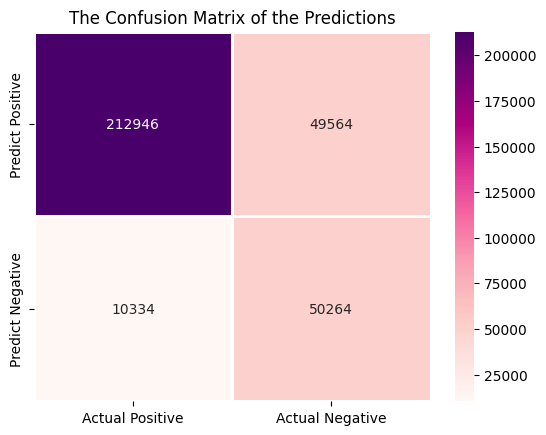

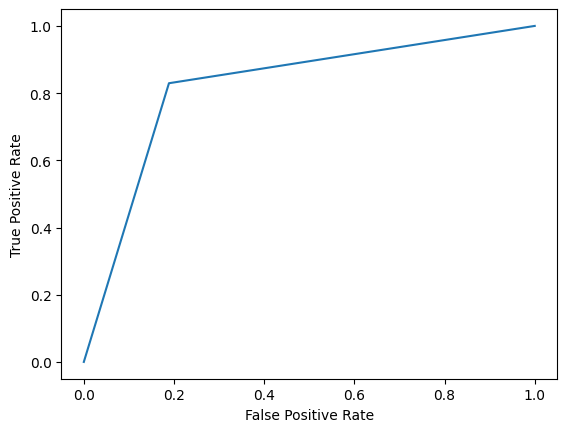



CatBoost AUC score: 0.8203291368063178






----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Confusion Matrix for the LightGBM model


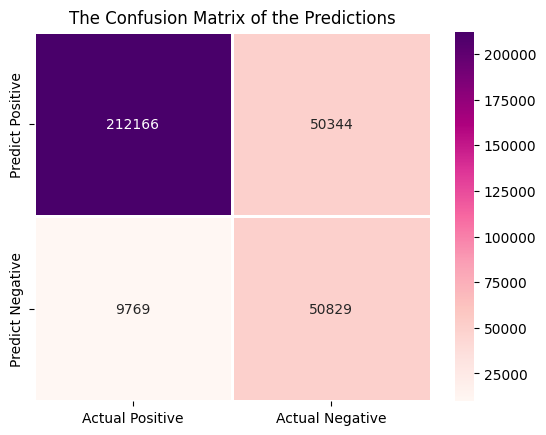

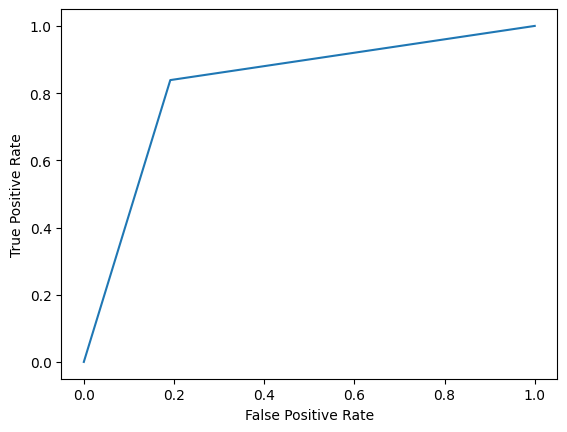



LightGBM AUC score: 0.8235053491458006






----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Confusion Matrix for the XGBoost model


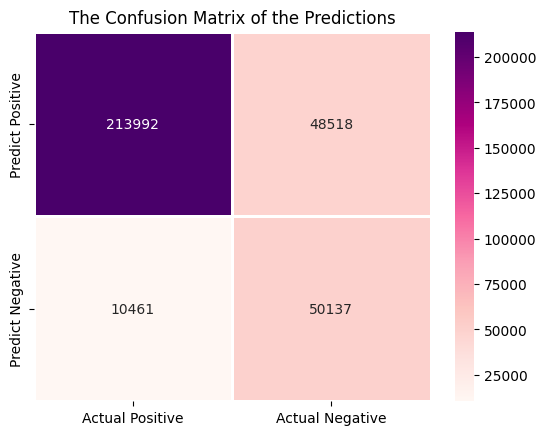

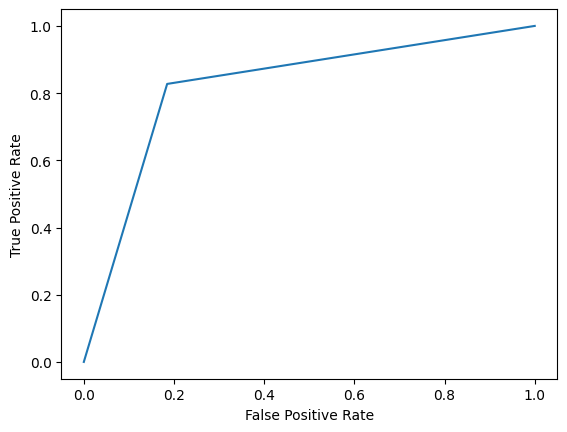



XGBoost AUC score: 0.8212735524920773






----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




,precision,recall,f1_score,accuracy,auc
model,,,,,
LightGBM,0.50240,0.83879,0.62841,0.81395,0.82351
XGBoost,0.50821,0.82737,0.62965,0.81746,0.82127
CatBoost,0.50351,0.82947,0.62663,0.81462,0.82033


In [42]:
# Evaluate the top models
final_model_eval = model_evaluation(fit_models = select_models, X_test = test_X, y_test = test_y)
final_model_eval

## Predict on the Unseen Data

In [43]:
# Import test data
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.00000,5.00000,2500.00000,833.00000,5.00000,0.00000,64.00000,70.00000,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.00000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.00000,7.00000,5637.00000,1879.00000,15.00000,7783.00000,30.00000,24.00000,0.00000,0.00000,NaN,NO,60,"Data:1000F=2GB,30d",4.00000


In [44]:
# Check the shape of the test data
test.shape

(190063, 18)

In [45]:
test_df = test

In [46]:
# Cast all column names to lowercase
test_df.columns = test_df.columns.str.lower()

In [47]:
# Fill the numeric columns with their respective mean values
test_df["montant"].fillna((test_df["montant"].mean()), inplace=True)
test_df["frequence_rech"].fillna((test_df["frequence_rech"].mean()), inplace=True)
test_df["arpu_segment"].fillna((test_df["arpu_segment"].mean()), inplace=True)
test_df["frequence"].fillna((test_df["frequence"].mean()), inplace=True)
test_df["data_volume"].fillna((test_df["data_volume"].mean()), inplace=True)
test_df["freq_top_pack"].fillna((test_df["freq_top_pack"].mean()), inplace=True)

test_df.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.00000,5.00000,2500.00000,833.00000,5.00000,0.00000,64.00000,70.00000,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.00000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,5506.54776,11.48394,NaN,1828.75028,13.93967,3358.42115,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,9.23433
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,5506.54776,11.48394,NaN,1828.75028,13.93967,0.00000,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,9.23433
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,5506.54776,11.48394,NaN,1828.75028,13.93967,3358.42115,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,9.23433
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.00000,7.00000,5637.00000,1879.00000,15.00000,7783.00000,30.00000,24.00000,0.00000,0.00000,NaN,NO,60,"Data:1000F=2GB,30d",4.00000


In [48]:
# Encode the "tenure" column
test_df["tenure"] = l_encoder.transform(test_df["tenure"])
complete_test = test_df.copy()

In [49]:
# Drop the useless columns
complete_test.drop(columns = ["user_id", "mrg", "top_pack", "region", "zone1", "zone2", "tigo", "orange", "on_net", "revenue"], inplace= True)

In [50]:
# Create a column for the target variable
complete_test["churn"] = 0

In [51]:
# Define the target and predictor variables
test_X = complete_test.drop(columns = ["churn"])
test_y = complete_test["churn"]

In [52]:
# Scale the numeric columns
test_X[numerics] = scaler.transform(test_X[numerics])

In [53]:
# Predict on the unseen data - LightGBM model
lightgbm_pred = lgb_model.predict_proba(test_X)
lightgbm_pred

array([[0.95610886, 0.04389114],
       [0.12801359, 0.87198641],
       [0.64344086, 0.35655914],
       ...,
       [0.12801359, 0.87198641],
       [0.84415959, 0.15584041],
       [0.12801359, 0.87198641]])

In [54]:
# Predict on the unseen data - XGBoost model
xgb_pred = xgb_model.predict_proba(test_X)
xgb_pred

array([[0.97088075, 0.02911924],
       [0.00226885, 0.99773115],
       [0.00937659, 0.9906234 ],
       ...,
       [0.00226885, 0.99773115],
       [0.03971732, 0.9602827 ],
       [0.00226885, 0.99773115]], dtype=float32)

**Averaging**

In [55]:
# Find the average of the two probabilities
lxgb_pred = (lightgbm_pred + xgb_pred) / 2
lxgb_pred

array([[0.9634948 , 0.03650519],
       [0.06514122, 0.93485878],
       [0.32640872, 0.67359128],
       ...,
       [0.06514122, 0.93485878],
       [0.44193845, 0.55806155],
       [0.06514122, 0.93485878]])

## 10 Exporting

## Exporting Relevant Components

In [61]:
import os

In [62]:
#Create Folder to export our components into 
!mkdir export

In [63]:
#Create a destination folder
destination = os.path.join('.','export')

In [64]:
# Export the requirements
requirements = "\n".join(f"{m.__name__}=={m.__version__}" for m in globals().values() if getattr(m, "__version__", None))

with open("requirements.txt", "w") as f:
    f.write(requirements)

In [65]:
# Create a dictionary of objects to export
components = {"encoder": l_encoder,
           "scaler": scaler,
           "model": xgb_model}

# Export the dictionary with Pickle
with open(os.path.join(destination,"App_toolkit.pkl"), "wb") as file:
    pickle.dump(components, file)

In [66]:
# Exporting the model
xgb_model.save_model("xgb_model.json")